In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Leyedo Dataset

In [6]:
df= pd.read_csv('data\googleplaystore.csv')

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.- Controlar calidad de datos: revisar aspectos como completitud (i.e. valores nulos o faltantes), outliers, inconsistencias (e.g. categorías inesperadas, tipo de dato erróneo), etc.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.shape

(10841, 13)

In [24]:
df.notnull().all()



App                True
Category           True
Rating            False
Reviews            True
Size               True
Installs           True
Type              False
Price              True
Content Rating    False
Genres             True
Last Updated       True
Current Ver       False
Android Ver       False
dtype: bool

In [34]:
#Valores Nulos Rating
df.Rating.isnull().sum()



1474

In [35]:
#Valores Nulos Type
df.Type.isnull().sum()

1

In [45]:
#Valores Nulos Type
df['Content Rating'].isnull().sum()

1

In [48]:
#Valores Nulos Type
df['Current Ver'].isnull().sum()

8

In [49]:
#Valores Nulos Type
df['Android Ver'].isnull().sum()

3

In [43]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [53]:
ratings = df[df["Rating"]<=5.]["Rating"].dropna()

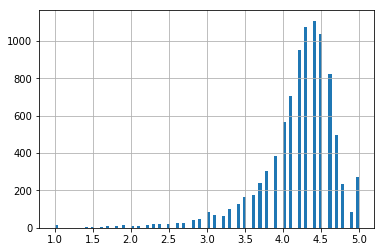

In [55]:
ratings.hist(bins=100)

In [56]:
ratings.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [57]:
df1= df[df["Rating"]<=5.].dropna()

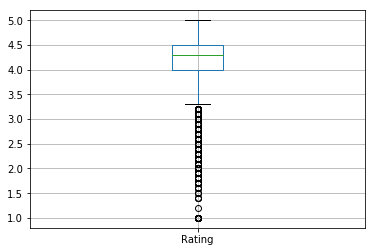

In [58]:
df1.boxplot(["Rating"])

In [64]:
df_type_gb = df.groupby("Type").count()

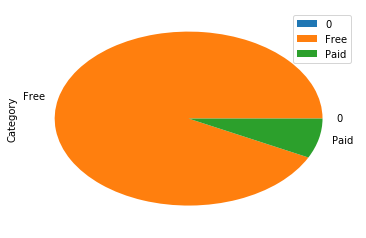

In [65]:
df_type_gb.plot.pie("Category")